### Edge Scale vs Communication Overhead


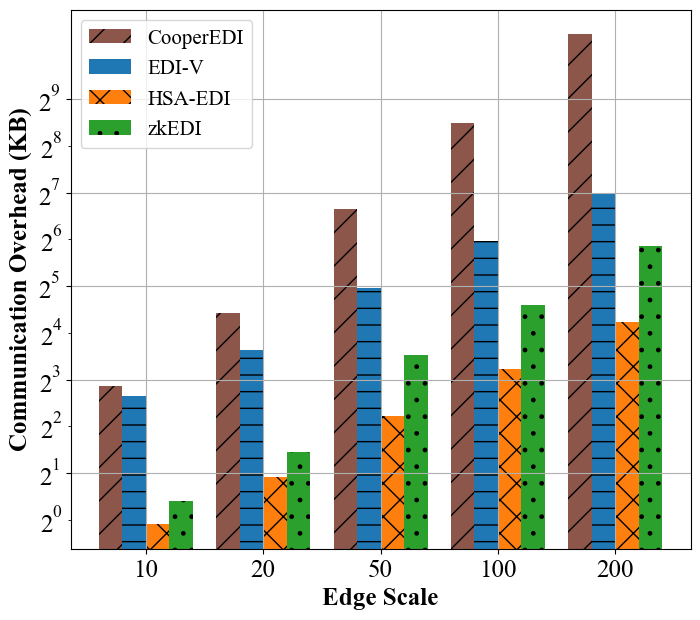

In [15]:
import matplotlib.pyplot as plt

PROOF_SIZE = 56

ns = [10, 20, 50, 100, 200]
ks = [4, 5, 12, 17, 27]

zkedi = {}
for i in range(len(ns)):
    n = ns[i]
    k = ks[i]
    # Only considering data size, not overall packet size
    # cluster-member to cluster-head + cluster-head to cluster-heads + cluster-head to cluster-member
    zkedi[n] = (2*PROOF_SIZE*(n-k)+(PROOF_SIZE+1)*k*(k-1))/1024

cooperedi = {}
for i in range(len(ns)):
    n = ns[i]
    # ground truth req + ground truth res + inspect req
    cooperedi[n] = (32*n*(n-1)+(n-1)+512*(n-1))/1024

ediv = {}
for i in range(len(ns)):
    n = ns[i]
    # audit request + integrity proof
    ediv[n] = 2*320*n/1024

hsaedi = {}
for i in range(len(ns)):
    n = ns[i]
    k = ks[i]
    hsaedi[n] = 96*n/1024

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)

bar_width = 0.2

b1 = ax.bar([i-1.5*bar_width for i in range(len(ns))], [cooperedi[n] for n in ns], color='tab:brown', width=bar_width, align='center')
for bar in b1:
    bar.set_hatch('/')

b2 = ax.bar([i-0.5*bar_width for i in range(len(ns))], [ediv[n] for n in ns], color='tab:blue', width=bar_width, align='center')
for bar in b2:
    bar.set_hatch('-')

b3 = ax.bar([i+0.5*bar_width for i in range(len(ns))], [hsaedi[n] for n in ns], color='tab:orange', width=bar_width, align='center')
for bar in b3:
    bar.set_hatch('x')

b4 = ax.bar([i+1.5*bar_width for i in range(len(ns))], [zkedi[n] for n in ns], color='tab:green', width=bar_width, align='center')
for bar in b4:
    bar.set_hatch('.')

ax.set_xticks([i for i in range(len(ns))])
ax.set_xticklabels(ns)
ax.set_xlabel('Edge Scale', fontdict={'fontweight': 'bold'})


ax.set_ylabel('Communication Overhead (KB)', fontdict={'fontweight': 'bold'})
ax.set_yscale('log', base=2)
ax.set_yticks([2**i for i in range(0, 10)], minor=True)

ax.grid(which='major')
ax.legend([b1, b2, b3, b4], ['CooperEDI', 'EDI-V', 'HSA-EDI', 'zkEDI'], loc='upper left', fontsize='small')

plt.rcParams['font.family'] = 'times new roman'
plt.rcParams.update({'font.size': 18})
plt.savefig("charts/edge_scale_vs_comm_overhead.pdf", format="pdf", bbox_inches="tight")
plt.show()


### Replica Scale vs Communication Overhead

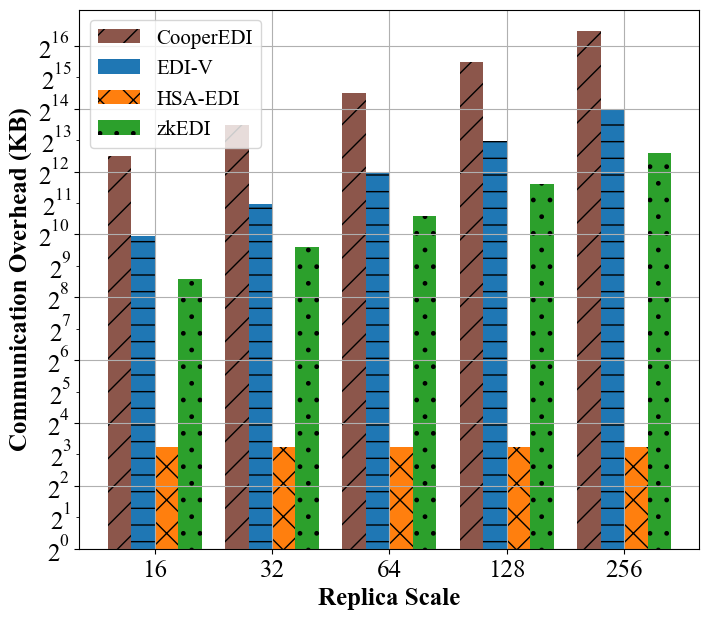

In [14]:
import matplotlib.pyplot as plt

PROOF_SIZE = 56

n = 100
k = 17
rss = [16, 32, 64, 128, 256]

zkedi = {}
for rs in rss:
    zkedi[rs] = rs*(2*PROOF_SIZE*(n-k)+(PROOF_SIZE+1)*k*(k-1))/(1024)

cooperedi = {}
for rs in rss:
    cooperedi[rs] = rs*(32*n*(n-1)+(n-1)+512*(n-1))/1024

ediv = {}
for rs in rss:
    ediv[rs] = rs*2*320*n/1024

hsaedi = {}
for rs in rss:
    hsaedi[rs] = 96*n/1024

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)

bar_width = 0.2

b1 = ax.bar([i-1.5*bar_width for i in range(len(rss))], [cooperedi[rs] for rs in rss], color='tab:brown', width=bar_width, align='center')
for bar in b1:
    bar.set_hatch('/')

b2 = ax.bar([i-0.5*bar_width for i in range(len(rss))], [ediv[rs] for rs in rss], color='tab:blue', width=bar_width, align='center')
for bar in b2:
    bar.set_hatch('-')

b3 = ax.bar([i+0.5*bar_width for i in range(len(rss))], [hsaedi[rs] for rs in rss], color='tab:orange', width=bar_width, align='center')
for bar in b3:
    bar.set_hatch('x')

b4 = ax.bar([i+1.5*bar_width for i in range(len(rss))], [zkedi[rs] for rs in rss], color='tab:green', width=bar_width, align='center')
for bar in b4:
    bar.set_hatch('.')

ax.set_xticks([i for i in range(len(rss))])
ax.set_xticklabels(rss)
ax.set_xlabel('Replica Scale', fontdict={'fontweight': 'bold'})

ax.set_ylabel('Communication Overhead (KB)', fontdict={'fontweight': 'bold'})
ax.set_yscale('log', base=2)
ax.set_yticks([2**i for i in range(0, 16)], minor=True)

ax.grid(which='major')
ax.legend([b1, b2, b3, b4], ['CooperEDI', 'EDI-V', 'HSA-EDI', 'zkEDI'], loc='upper left', fontsize='small')

plt.rcParams['font.family'] = 'times new roman'
plt.rcParams.update({'font.size': 18})
plt.savefig("charts/replica_scale_vs_comm_overhead.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Replica Size vs Communication Overhead

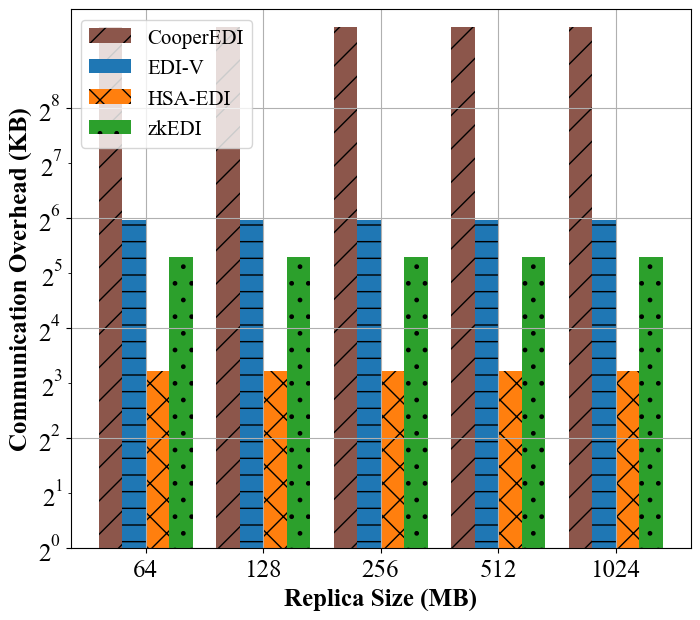

In [18]:
import matplotlib.pyplot as plt

PROOF_SIZE = 56

n = 100
k = 17
rss = [64, 128, 256, 512, 1024]

zkedi = {}
for rs in rss:
    zkedi[rs] = 2*(PROOF_SIZE*(n-k)+(PROOF_SIZE+1)*k*(k-1))/1024

cooperedi = {}
for rs in rss:
    cooperedi[rs] = 2*(32*n*(n-1)+(n-1)+512*(n-1))/1024

ediv = {}
for rs in rss:
    ediv[rs] = 2*320*n/1024

hsaedi = {}
for rs in rss:
    hsaedi[rs] = 96*n/1024

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)

bar_width = 0.2

b1 = ax.bar([i-1.5*bar_width for i in range(len(rss))], [cooperedi[rs] for rs in rss], color='tab:brown', width=bar_width, align='center')
for bar in b1:
    bar.set_hatch('/')

b2 = ax.bar([i-0.5*bar_width for i in range(len(rss))], [ediv[rs] for rs in rss], color='tab:blue', width=bar_width, align='center')
for bar in b2:
    bar.set_hatch('-')

b3 = ax.bar([i+0.5*bar_width for i in range(len(rss))], [hsaedi[rs] for rs in rss], color='tab:orange', width=bar_width, align='center')
for bar in b3:
    bar.set_hatch('x')

b4 = ax.bar([i+1.5*bar_width for i in range(len(rss))], [zkedi[rs] for rs in rss], color='tab:green', width=bar_width, align='center')
for bar in b4:
    bar.set_hatch('.')
    
ax.set_xticks([i for i in range(len(rss))])
ax.set_xticklabels(rss)
ax.set_xlabel('Replica Size (MB)', fontdict={'fontweight': 'bold'})

ax.set_ylabel('Communication Overhead (KB)', fontdict={'fontweight': 'bold'})
ax.set_yscale('log', base=2)
ax.set_yticks([2**i for i in range(0, 8)], minor=True)

ax.grid(which='major')
ax.legend([b1, b2, b3, b4], ['CooperEDI', 'EDI-V', 'HSA-EDI', 'zkEDI'], loc='upper left', fontsize='small')

plt.rcParams['font.family'] = 'times new roman'
plt.rcParams.update({'font.size': 18})
plt.savefig("charts/replica_size_vs_comm_overhead.pdf", format="pdf", bbox_inches="tight")
plt.show()